# Paper: Space, persistence and dynamics of measles epidemics

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

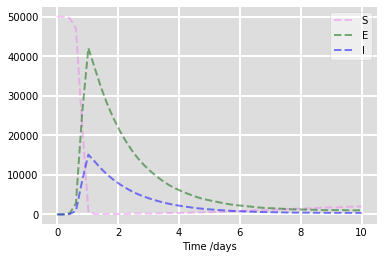

In [6]:
# Initial conditions
S0 = 5e4
E0 = 0
I0 = 1
N = S0 + E0 + I0

# A grid of time points (in days)
t = np.linspace(0, 10, 50) 

#parameters
mu = 0.02
beta0 = 0.0010107 * N
beta1 = 0.28 
gamma = 100
sigma = 35.84

# The SIR model differential equations.
def deriv(y, t, N, mu, beta0, beta1, gamma, sigma):
    S, E, I = y
    beta = beta0 * (1 + beta1 * np.cos(2 * np.pi * t))

    dSdt = mu * (N - S) - (beta * S * I)/N
    dEdt = (beta * S * I)/N - (mu * sigma) * E
    dIdt = sigma * E - (mu + gamma) * I

    return dSdt, dEdt, dIdt


# Initial conditions vector
y0 = S0, E0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, mu, beta0, beta1, gamma, sigma))
S, E, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='S', linestyle='dashed')
ax.plot(t, E, 'darkgreen', alpha=0.5, lw=2, label='E', linestyle='dashed')
ax.plot(t, I, 'blue', alpha=0.5, lw=2, label='I', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [4]:
#save to csv file
a = np.asarray([t, S, E, I]) 

# np.savetxt("measles.csv", a, delimiter=",")